In [2]:
from astropy import units as u
import numpy as np
import astropy.io.fits as pf
import ccdproc
import os
import astropy.wcs.utils as shift
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.nddata import CCDData
import glob
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import pandas as pd
from scipy.interpolate import UnivariateSpline
from photutils import CircularAperture, aperture_photometry, CircularAnnulus, datasets, DAOStarFinder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


c1Vimg=[]
c1Vhdr=[]
c1Vfile=[]
c1Bimg=[]
c1Bhdr=[]
c1Bfile=[]
c1Iimg=[]
c1Ihdr=[]
c1Ifile=[]
c1Rimg=[]
c1Rhdr=[]
c1Rfile=[]

pathV='ceph1data/Calibrated/c1v*.fits'
pathB='ceph1data/Calibrated/c1b*.fits'
pathI='ceph1data/Calibrated/c1i*fits'
pathR='ceph1data/Calibrated/c1r*fits'

namesV=glob.glob(pathV,recursive=True)
namesB=glob.glob(pathB,recursive=True) 
namesI=glob.glob(pathI,recursive=True) 
namesR=glob.glob(pathR,recursive=True) 

for file in namesV:
    headerV=pf.getheader(file,0)
    imageV=pf.getdata(file,0)
    c1Vfile.append(file)
    c1Vimg.append(imageV)
    c1Vhdr.append(headerV)
  
for file in namesB:
    headerB=pf.getheader(file,0)
    imageB=pf.getdata(file,0)
    c1Bfile.append(file)
    c1Bimg.append(imageB)
    c1Bhdr.append(headerB)    
    
for file in namesI:
    headerI=pf.getheader(file,0)
    imageI=pf.getdata(file,0)
    c1Ifile.append(file)
    c1Iimg.append(imageI)
    c1Ihdr.append(headerI)

for file in namesR:
    headerR=pf.getheader(file,0)
    imageR=pf.getdata(file,0)
    c1Rfile.append(file)
    c1Rimg.append(imageR)
    c1Rhdr.append(headerR)

(7, 2)
[541.21306884 496.41208868]


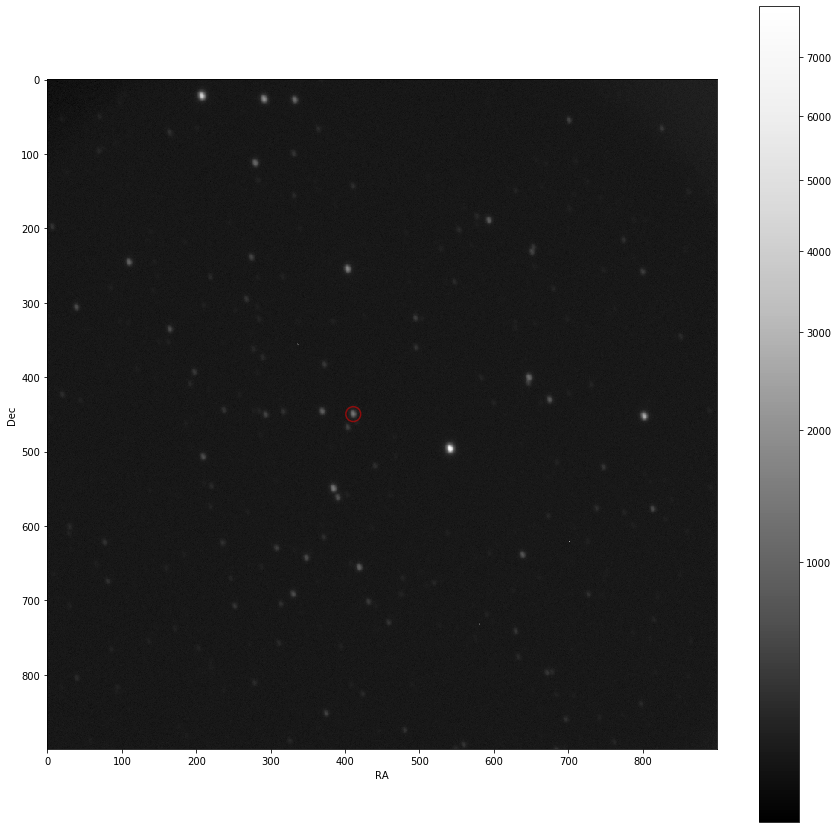

In [2]:
obj1=c1Vimg[1]
hdu=c1Vhdr[1]
wcs = WCS(hdu)

#,("06:47:15.85 +03:57:25.07")


coords0=[("06:47:09.4 +03:58:01.5"),("06:47:15.95 +03:57:26.88"),("06:47:14.87867 +03:58:30.09"),
         ("06:47:15.26592 +04:00:32.10"),('06:47:04.996 +03:59:01.2777'),('06:47:14.46000 +03:56:21.076'),
        ('06:47:16.59264 +03:58:31.972')]

coords0=[("06:47:09.4 +03:58:01.5"),("06:47:15.95 +03:57:26.88"),("06:47:14.87867 +03:58:30.09"),
         ("06:47:15.26592 +04:00:32.10"),('06:47:04.996 +03:59:01.2777'),('06:47:14.46000 +03:56:21.076'),
        ('06:47:16.59264 +03:58:31.972')]

#pos4
c0 = SkyCoord(coords0, frame=ICRS, unit=(u.hourangle, u.deg), obstime="J2000.0")

y0=shift.skycoord_to_pixel(c0, wcs,origin=0, mode='wcs')
#y1=shift.skycoord_to_pixel(c1, wcs,origin=0, mode='wcs')
fig=plt.figure()
#fig.add_subplot(111, projection=wcs)
fig.set_figheight(15)
fig.set_figwidth(15)
#plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)



positions=y0
positions = np.transpose((positions[:][0], positions[:][1]))

print(np.shape(positions))
apertures = CircularAperture(positions[2], r=10.)
annulus=CircularAnnulus(positions[3], r_in=12, r_out=14)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(obj1, cmap='Greys_r',norm=norm)
plt.colorbar()
apertures.plot(color='red', lw=1.5, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('Dec')
print(positions[0])

496
541
[7.17948718]


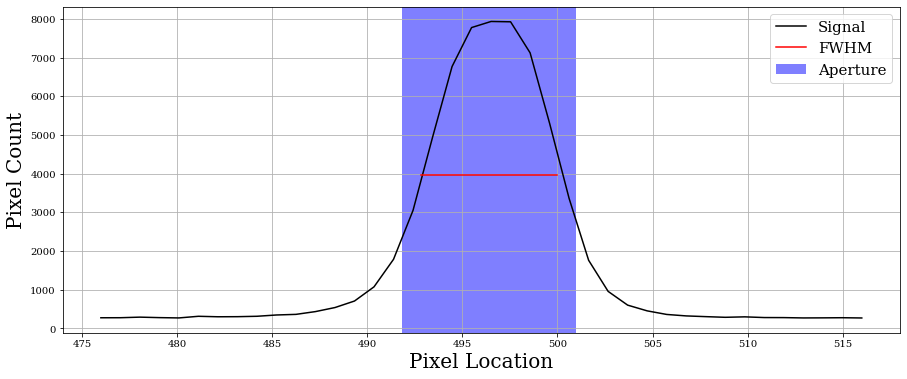

In [3]:
x_float=positions[0][1]
xpos=int(np.rint(positions[0][1]))
ypos=int(np.rint(positions[0][0]))
print(xpos)
print(ypos)

x=np.linspace(xpos-20,xpos+20,40)
y=c1Vimg[1][xpos-20:xpos+20,ypos]



def FWHM(X,Y):
    half_max = max(Y) / 2.
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx]



fwhm=FWHM(x,y)
print(fwhm)

x1=np.linspace(x_float-fwhm/2,x_float+fwhm/2,30)
y1=np.ones(len(x1))*(np.max(y)/2)



r1=x_float-1-fwhm/2
r2=x_float+1+fwhm/2
r1a=x_float-fwhm/2
r2a=x_float+fwhm/2


plt.rcParams["font.family"] = "serif"
plt.figure(figsize=(15,6))
plt.plot(x,y,'k-',label='Signal')
plt.plot(x1,y1,'r-',label='FWHM')

plt.axvspan(r1, r2, facecolor='b', alpha=0.5,label='Aperture')

plt.grid(True)
plt.ylabel('Pixel Count',fontsize=20)
plt.xlabel('Pixel Location',fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(r'gaussian.pdf')

496
541


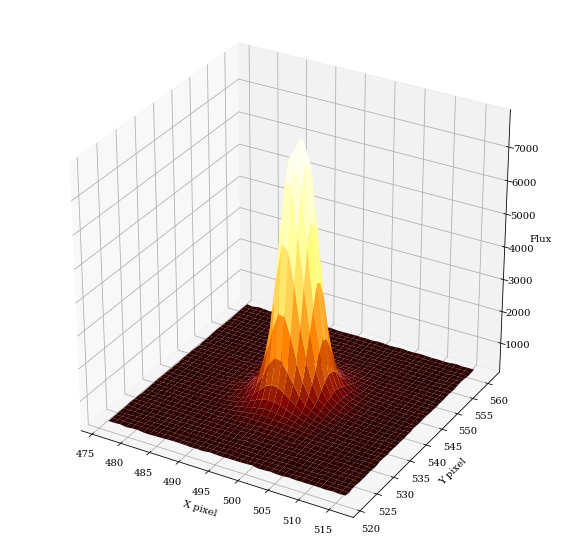

In [4]:
x_float=positions[0][1]
xpos=int(np.rint(positions[0][1]))
ypos=int(np.rint(positions[0][0]))
print(xpos)
print(ypos)
z=c1Vimg[1][xpos-20:xpos+20,ypos-20:ypos+20]
x=np.linspace(xpos-20,xpos+20,40)
y=np.linspace(ypos-20,ypos+20,40)


X,Y=np.meshgrid(x,y)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,z,norm=norm,cmap='afmhot')

ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
ax.set_zlabel('Flux')
plt.savefig('3d.png')
#print(z)

In [5]:
positions=[]

#coords0=("05:28:46.182 +42:26:15.311")
coords0=[("06:47:09.4 +03:58:01.5"),("06 47 05.24472 +03 56 32.6688"),("06:47:14.87867 +03:58:30.09"),
         ("06:47:15.26592 +04:00:32.10"),('06:47:04.996 +03:59:01.2777'),('06:47:14.46000 +03:56:21.076'),
        ('06:47:16.59264 +03:58:31.972')]

c0 = SkyCoord(coords0, frame=ICRS, unit=(u.hourangle, u.deg), obstime="J2000.0")

for i in range(len(c1Vimg)):  
    indexlist=[]
    obj1=c1Vimg[i]
    hdu=c1Vhdr[i]
    wcs = WCS(hdu)
    y=shift.skycoord_to_pixel(c0, wcs,origin=0, mode='wcs')
    loc= np.transpose((y[:][0], y[:][1]))
    positions.append(loc)
    

In [6]:
positions[0][0][0]

519.2194336556939

In [7]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx]




fwhm_val=[]
appV_val=[]

for i in range(len(c1Vimg)): 
    x_float=positions[i][0][1]
    xpos=int(np.rint(positions[i][0][1]))
    ypos=int(np.rint(positions[i][0][0]))    
    x=np.linspace(xpos-20,xpos+20,40)
    y=c1Vimg[i][xpos-20:xpos+20,ypos]
    fwhm=FWHM(x,y)
    app=np.rint(fwhm+2)
    fwhm_val.append(fwhm)
    appV_val.append(app)
   

In [8]:
appV_val

[array([6.]),
 array([9.]),
 array([8.]),
 array([10.]),
 array([5.]),
 array([6.]),
 array([4.]),
 array([5.]),
 array([4.])]

In [9]:


sourceflux = []
tfr1 = []
tfr2 = []
tfr3 = []
tfr4 = []
tfr5 = []
tfr6 = []


 
for i in range(len(positions)):
    

    
        x_S, y_S = positions[i][0]
        x_1, y_1 = positions[i][1]
        x_2, y_2 = positions[i][2]
        x_3, y_3 = positions[i][3]
        x_4, y_4 = positions[i][4]
        x_5, y_5 = positions[i][5]
        x_6, y_6 = positions[i][6]

        image= c1Vimg[i] 
        appsize=appV_val[i][0]
        positionsa = [(x_S,y_S),(x_1,y_1),(x_2, y_2),(x_3, y_3),(x_4, y_4),(x_5, y_5),(x_6, y_6)]
        apertures = CircularAperture(positionsa,r=appsize)
        annulus_apertures = CircularAnnulus(positionsa, r_in=appsize+2, r_out=appsize+4)
        apers = [apertures,annulus_apertures]
        phot_table = aperture_photometry(image,apers)
        bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area
        bkg_sum = bkg_mean * apertures.area
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['residual_aperture_sum']=final_sum

        sourceflux.append(final_sum[0])
        tfr1.append(final_sum[1])
        tfr2.append(final_sum[2])
        tfr3.append(final_sum[3])
        tfr4.append(final_sum[4])
        tfr5.append(final_sum[5])
        tfr6.append(final_sum[6])
        #print(phot_table)
       
        

Text(0.5, 0, 'Phase')

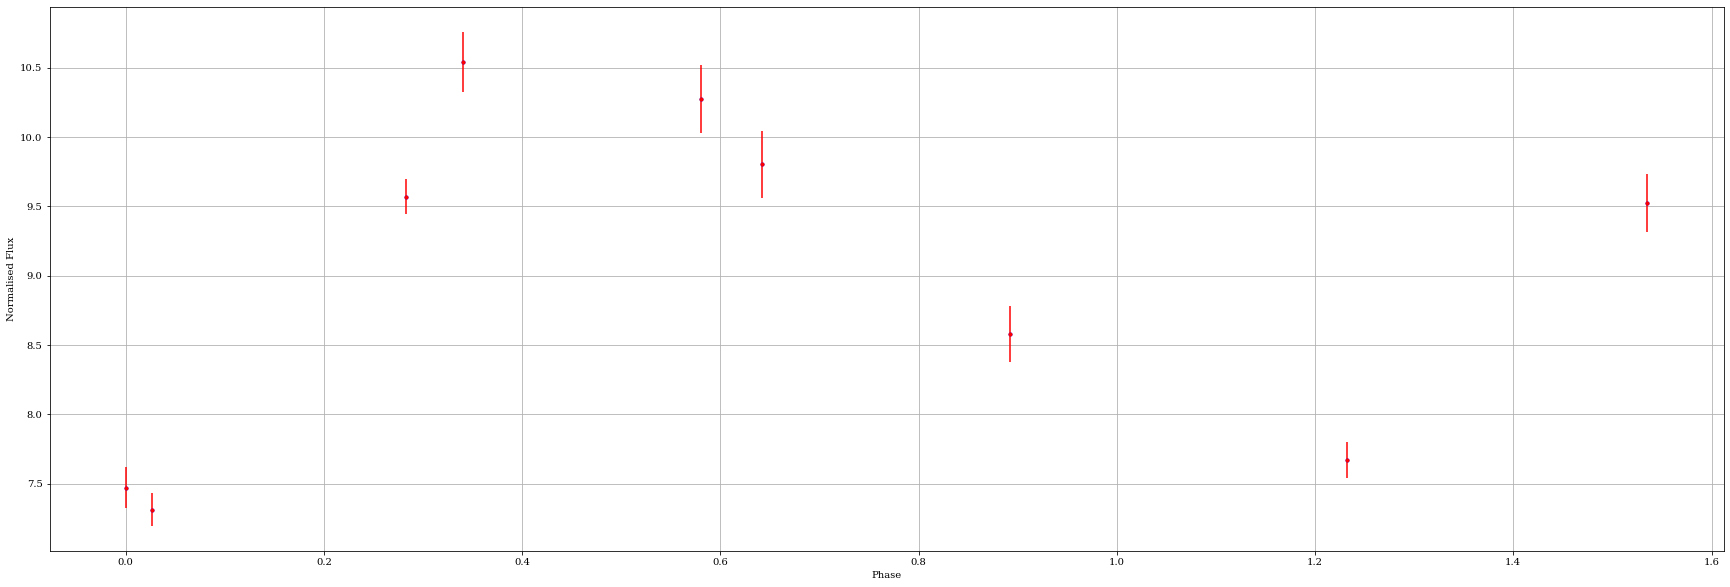

In [10]:
tfs=np.array(sourceflux)
tfr1=np.array(tfr1)
tfr2=np.array(tfr2)
tfr3=np.array(tfr3)
tfr4=np.array(tfr4)
tfr5=np.array(tfr5)
tfr6=np.array(tfr6)



flux1=(tfs/tfr2)
flux2=tfs/tfr2
flux3=(2*tfs)/(tfr1+tfr2)
π=np.pi

t1=np.linspace(-2,6.5,len(tfs))
t=np.linspace(-π,π,100)

tact=np.array([0,127,1332,1602,2733,3023,4200,5803,7229])

tact=tact/1140
tact=tact/4.13

#tact=np.array([1., 1.02697422, 1.28291067, 1.34025742, 0.58047662, 0.89206066, 1.23253048, 1.53540631])
#tact=tact-0.44
tactlong=np.linspace(-2,6.5,100)
from scipy.optimize import curve_fit

def func(x,b,c,d,e,f):
    return b*x**4+c*x**3+d*x**2+e*x+f

def func1(x,a,b,c):
    return a*np.sin(x+b*np.sin(x))+c

#opt,cov=curve_fit(func,tact,flux1)
#opt1,cov1=curve_fit(func1,t1,flux1)
#
rootfs=np.sqrt(tfs)
rootf1=np.sqrt(tfr1)

error=np.sqrt((rootfs/tfr1)**2+((tfs*rootf1)/tfr1**2)**2)

#t=np.arange(0,len(tfs),1)
plt.figure(figsize=(30,10))

plt.plot(tact,flux1,'b.')

#plt.plot(x,y,'r-',)
#plt.plot(tactlong+0.5,func1(tactlong,*opt1),'b-',linewidth=0.8)
plt.errorbar(tact,flux1, yerr=error,fmt='r.')
plt.grid(True)
#plt.ylim(10**5,10**6)

#plt.gca().invert_yaxis()
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')
#plt.savefig(r'lightcurve2V.png')

In [19]:

from scipy.optimize import curve_fit

def Mag_ref(f):
    return -2.5*np.log10(f)

def func(x,a,b):
    return a*x+b

actmag=np.array([13.739,12.746,12.460,12.782,13.32])


errV=np.array([0.037,0.037,0.031,0.039,0.037])

#12.519,
#B12.782
#12.746,D
mlist=[]
clist=[]
covlist=[]

machinemagA=Mag_ref(tfr1)
machinemagB=Mag_ref(tfr2)
machinemagC=Mag_ref(tfr3)
machinemagD=Mag_ref(tfr4)
machinemagE=Mag_ref(tfr5)
machinemagF=Mag_ref(tfr6)
sourcemag=Mag_ref(tfs)

realsource=[]
guess=[1,24]
for i in range(len(tfr1)): 
    
    magnitudes=([machinemagA[i],machinemagB[i],machinemagC[i],machinemagD[i],machinemagE[i]])
    #magnitudes=([machinemagD[i],machinemagE[i],machinemagF[i]])
    opt,cov = curve_fit(func,magnitudes,actmag,p0=guess,sigma=errV)
    mlist.append(opt[0])
    clist.append(opt[1])
    covlist.append(cov)
    

    
print(mlist)
print(clist)   

[0.9851903627902472, 0.99712258512751, 0.9644379200002825, 1.0825814134394798, 1.0059514523248718, 1.0183610876548403, 1.0079908939314184, 0.9935630590069451, 0.9909954858470512]
[23.955309223633083, 24.414748606622304, 24.433666057920718, 24.71934578271881, 23.690184737183, 23.719750220311553, 23.697950679399966, 24.337915481969638, 23.66997655993804]


In [42]:
for i in range(len(c1Vimg)):
    print(np.max(c1Vimg[i]))

16825.79749316157
7936.209616792836
16157.444547714791
6110.048131286994
34176.77654695617
13417.685060677384
28418.764474674703
57652.162333698034
26978.746652057944


Text(0.5, 0, 'Input Mag')

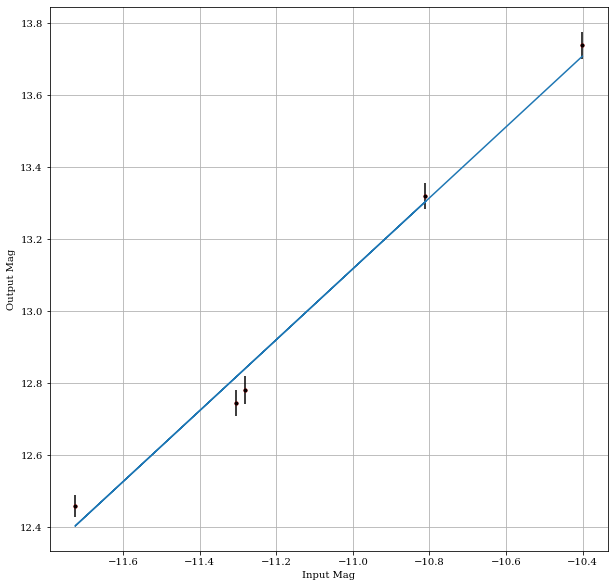

In [16]:

    
    
    

#x=sourcemag[0]
#y=mlist[0]*sourcemag[0]+clist[0]
#
magnitudes=([machinemagA[0],machinemagB[0],machinemagC[0],machinemagD[0],machinemagE[0]])
             
m=np.ones(len(magnitudes))*mlist[0]
c=np.ones(len(magnitudes))*clist[0]

#
#magnitudes=np.ones(len(magnitudes))-magnitudes

plt.figure(figsize=(10,10))
#plt.plot(x,y,'b.')
plt.plot(magnitudes,actmag,'r.')
plt.errorbar(magnitudes,actmag,yerr=errV,fmt='k.')
plt.plot(magnitudes,func(magnitudes,m,c))
plt.grid(True)
#plt.xlim(-0.06,0.06)
plt.ylabel(r'Output Mag')
plt.xlabel(r'Input Mag')

In [17]:
realmagsourceV=[]

for i in range(len(sourcemag)):
    y=mlist[i]*sourcemag[i]+clist[i]
    realmagsourceV.append(y)
    
    
Vunc_m=[]
Vunc_c=[]
Vunc_mc=[]

for i in range(len(covlist)):
    Vunc_m.append(np.sqrt(covlist[i][0,0]))
    Vunc_c.append(np.sqrt(covlist[i][1,1]))
    Vunc_mc.append(np.sqrt(covlist[i][0,1]))

    
print(Vunc_m)
print(Vunc_c)
print(Vunc_mc)

[0.0628332792321475, 0.05807761445736559, 0.17380768889550838, 0.13960719508029956, 0.08689763749297662, 0.063622970074085, 0.1324532620114977, 0.0844325297638885, 0.14136133406363402]
[0.701255667778898, 0.6671614020065955, 2.0675357890361843, 1.5163308643081537, 0.9269221768373568, 0.6722372595291105, 1.4109804779586852, 0.9668530138145384, 1.527701859736632]
[0.2098159632830352, 0.1967615549868426, 0.5992336991344813, 0.45992489531858044, 0.28367652241461727, 0.20671168263419826, 0.4321112161917217, 0.2855979887746195, 0.4645035307194587]


[10.666858682188584, 10.669685821698256, 10.401700216077673, 9.992682086929074, 10.253160718377202, 10.290465403479072, 10.43179917801673, 10.603589876425142, 10.344637757569881]
10.40606441564018
[0.         0.02697422 0.28291067 0.34025742 0.58047662 0.64207128
 0.89206066 1.23253048 1.53540631]
[1.3711824  1.28656565 3.87470047 2.91083259 1.81747462 1.32663701
 2.79207581 1.86175547 2.98936058]


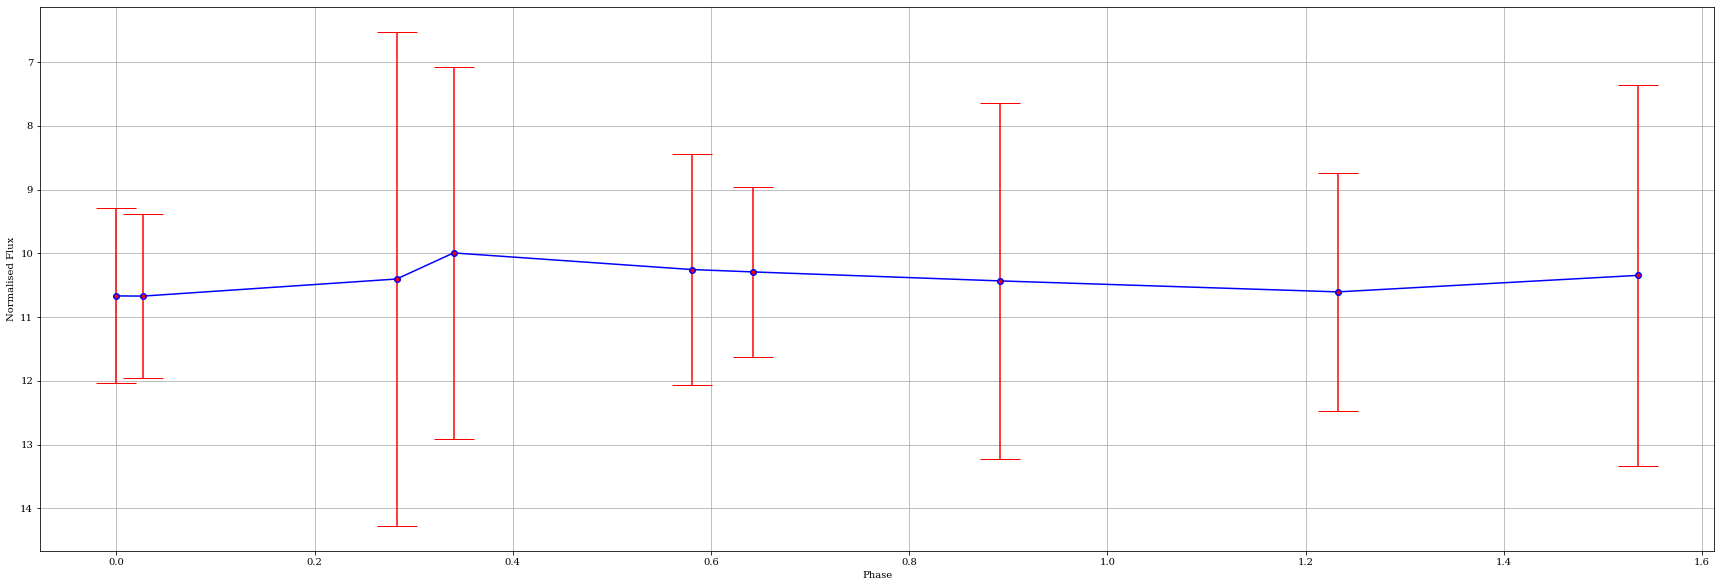

In [14]:

print(realmagsourceV)

from scipy.optimize import curve_fit

errY=[] 
for i in range(len(realmagsourceV)):
    err_sm=np.sqrt(((Vunc_m[i]**2)*(realmagsourceV[i])**2)+(Vunc_c[i]**2)+2*realmagsourceV[i]*Vunc_mc[i]**2)    
    errY.append(err_sm)
 

errY=np.array(errY)

print(np.mean(realmagsourceV))

print(tact)

plt.figure(figsize=(30,10))
plt.plot(tact,realmagsourceV,'bo-')
#plt.plot(curvephase,curve,'r--')
plt.errorbar(tact,realmagsourceV,yerr=errY,fmt='r.',capsize=20)

plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(-10.8,-12)
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')    
print(errY)

# B values 

In [22]:

Bpositions=[]

#coords0=("05:28:46.182 +42:26:15.311")
coords0=[("06:47:09.4 +03:58:01.5"),("06 47 05.24472 +03 56 32.6688"),("06:47:14.87867 +03:58:30.09"),
         ("06:47:15.26592 +04:00:32.10"),('06:47:04.996 +03:59:01.2777'),('06:47:14.46000 +03:56:21.076'),
        ('06:47:16.59264 +03:58:31.972')]

c0 = SkyCoord(coords0, frame=ICRS, unit=(u.hourangle, u.deg), obstime="J2000.0")

for i in range(len(c1Bimg)):  
    indexlist=[]
    obj1=c1Bimg[i]
    hdu=c1Bhdr[i]
    wcs = WCS(hdu)
    y=shift.skycoord_to_pixel(c0, wcs,origin=0, mode='wcs')
    loc= np.transpose((y[:][0], y[:][1]))
    Bpositions.append(loc)
    

In [23]:
fwhm_val=[]
appB_val=[]

for i in range(len(c1Bimg)): 
    x_float=Bpositions[i][0][1]
    xpos=int(np.rint(Bpositions[i][0][1]))
    ypos=int(np.rint(Bpositions[i][0][0]))    
    x=np.linspace(xpos-20,xpos+20,40)
    y=c1Bimg[i][xpos-20:xpos+20,ypos]
    fwhm=FWHM(x,y)
    app=np.rint(fwhm+2)
    fwhm_val.append(fwhm)
    appB_val.append(app)

In [24]:
appB_val

[array([5.]),
 array([7.]),
 array([13.]),
 array([4.]),
 array([6.]),
 array([4.]),
 array([4.]),
 array([5.])]

In [25]:
sourceflux = []
tfr1 = []
tfr2 = []
tfr3 = []
tfr4 = []
tfr5 = []
tfr6 = []


 
for i in range(len(Bpositions)):
    

    
        x_S, y_S = Bpositions[i][0]
        x_1, y_1 = Bpositions[i][1]
        x_2, y_2 = Bpositions[i][2]
        x_3, y_3 = Bpositions[i][3]
        x_4, y_4 = Bpositions[i][4]
        x_5, y_5 = Bpositions[i][5]
        x_6, y_6 = Bpositions[i][6]

        image= c1Bimg[i] 
        appsize=appB_val[i][0]
        positionsa = [(x_S,y_S),(x_1,y_1),(x_2, y_2),(x_3, y_3),(x_4, y_4),(x_5, y_5),(x_6, y_6)]
        apertures = CircularAperture(positionsa,r=appsize)
        annulus_apertures = CircularAnnulus(positionsa, r_in=appsize+2, r_out=appsize+4)
        apers = [apertures,annulus_apertures]
        phot_table = aperture_photometry(image,apers)
        bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area
        bkg_sum = bkg_mean * apertures.area
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['residual_aperture_sum']=final_sum

        sourceflux.append(final_sum[0])
        tfr1.append(final_sum[1])
        tfr2.append(final_sum[2])
        tfr3.append(final_sum[3])
        tfr4.append(final_sum[4])
        tfr5.append(final_sum[5])
        tfr6.append(final_sum[6])
        #print(phot_table)
       
        

Text(0.5, 0, 'Phase')

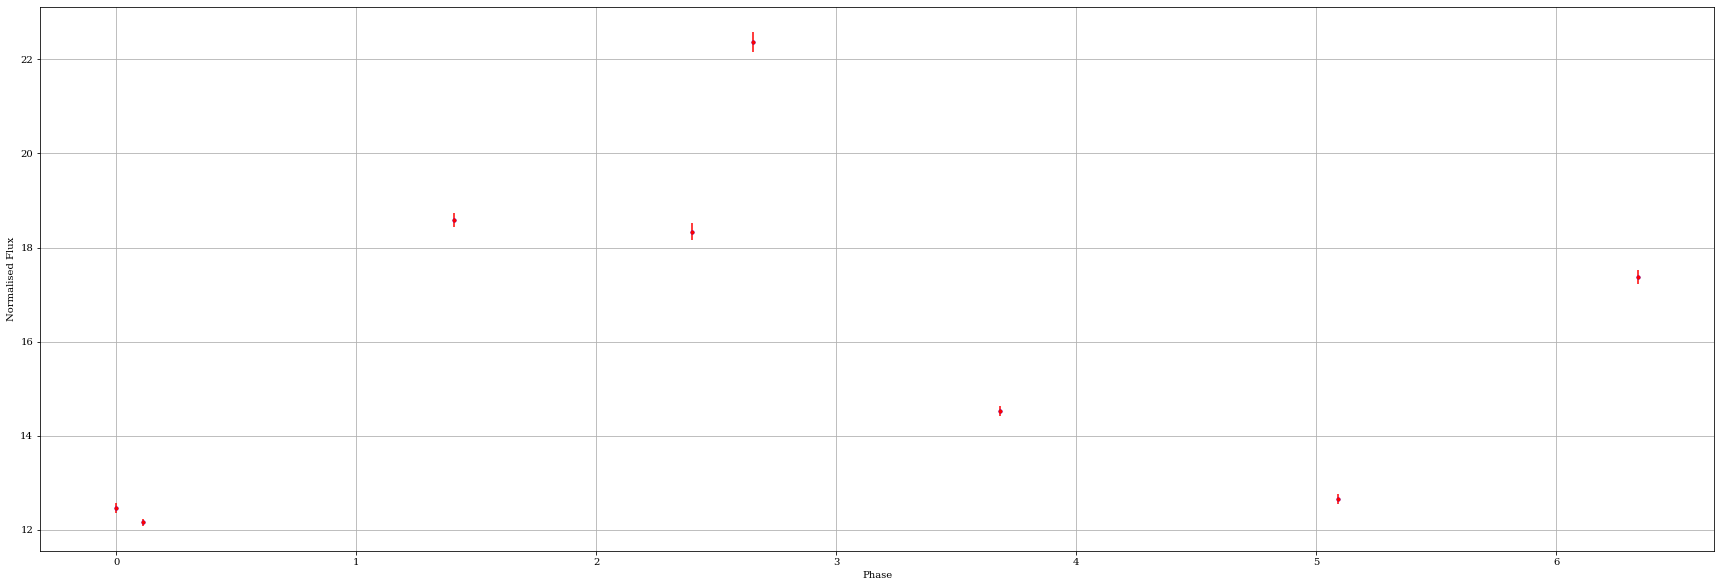

In [26]:
tfs=np.array(sourceflux)
tfr1=np.array(tfr1)
tfr2=np.array(tfr2)
tfr3=np.array(tfr3)
tfr4=np.array(tfr4)
tfr5=np.array(tfr5)
tfr6=np.array(tfr6)



flux1=(tfs/tfr1)
flux2=tfs/tfr1
flux3=(2*tfs)/(tfr1+tfr2)
π=np.pi



tact=np.array([0,127,1602,2733,3023,4200,5803,7229])

tact=tact/1140


#tact=np.array([1., 1.02697422, 1.28291067, 1.34025742, 0.58047662, 0.89206066, 1.23253048, 1.53540631])
#tact=tact-0.44
tactlong=np.linspace(-2,6.5,100)
from scipy.optimize import curve_fit

def func(x,b,c,d,e,f):
    return b*x**4+c*x**3+d*x**2+e*x+f

def func1(x,a,b,c):
    return a*np.sin(x+b*np.sin(x))+c

#opt,cov=curve_fit(func,tact,flux1)
#opt1,cov1=curve_fit(func1,t1,flux1)
#
rootfs=np.sqrt(tfs)
rootf1=np.sqrt(tfr1)

error=np.sqrt((rootfs/tfr1)**2+((tfs*rootf1)/tfr1**2)**2)

#t=np.arange(0,len(tfs),1)
plt.figure(figsize=(30,10))

plt.plot(tact,flux1,'b.')

#plt.plot(x,y,'r-',)
#plt.plot(tactlong+0.5,func1(tactlong,*opt1),'b-',linewidth=0.8)
plt.errorbar(tact,flux1, yerr=error,fmt='r.')
plt.grid(True)
#plt.ylim(10**5,10**6)

#plt.gca().invert_yaxis()
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')
#plt.savefig(r'lightcurve2V.png')

In [29]:
from scipy.optimize import curve_fit

def Mag_ref(f):
    return -2.5*np.log10(f)

def func(x,a,b):
    return a*x+b

#actmagB=np.array([12.460,12.782,13.32])
actmagB=np.array([14.202,13.111,12.657,13.542,14.064])
#actmagB=np.array([13.45,12.17,12.78,13.09])
errB=np.array([0.089,0.131,0.07,0.09,0.1])

#12.519,
#B12.782
#12.746,D
mlist=[]
clist=[]
covlist=[]

machinemagA=Mag_ref(tfr1)
machinemagB=Mag_ref(tfr2)
machinemagC=Mag_ref(tfr3)
machinemagD=Mag_ref(tfr4)
machinemagE=Mag_ref(tfr5)
machinemagF=Mag_ref(tfr6)
sourcemagB=Mag_ref(tfs)

realsource=[]


guess=[1,24]

for i in range(len(tfr1)): 
    
    magnitudes=([machinemagA[i],machinemagB[i],machinemagC[i],machinemagD[i],machinemagE[i]])
    #magnitudes=([machinemagD[i],machinemagE[i],machinemagF[i]])
    opt,cov = curve_fit(func,magnitudes,actmagB,p0=guess,sigma=errB)
    mlist.append(opt[0])
    clist.append(opt[1])
    covlist.append(cov)
    

    
print(mlist)
print(clist)   

[1.0567082660826228, 1.0890844817234488, 1.1360634253116535, 1.0529746361341221, 1.2471362788915556, 1.0487679379352326, 1.035367687784089, 1.0646341304966467]
[25.27842553560731, 26.238251402683588, 26.18756780474852, 24.717895122807917, 27.05968053926411, 25.515646389990383, 25.012817074347755, 25.236521221636398]


In [30]:
for i in range(len(c1Bimg)):
    print(np.max(c1Bimg[i]))

16177.547958620593
11364.822358134532
5021.375976057043
31323.658317162837
12807.902007472609
36564.43413270081
23469.786798559668
27063.00523789002


Text(0.5, 0, 'Input Mag')

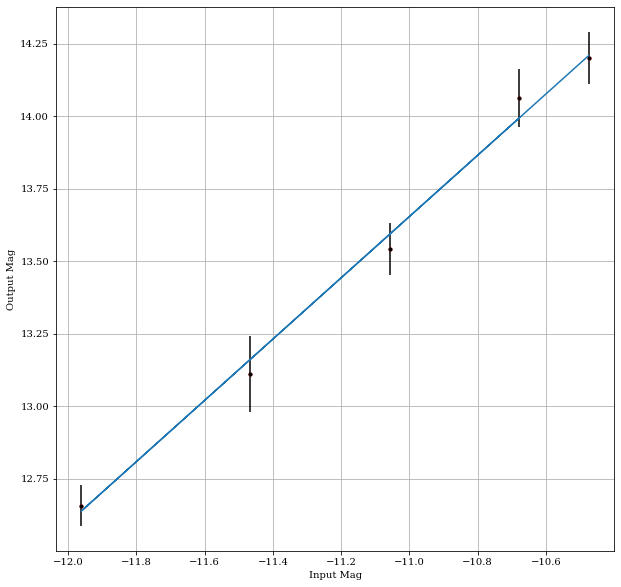

In [31]:
magnitudes=([machinemagA[0],machinemagB[0],machinemagC[0],machinemagD[0],machinemagE[0]])
m=np.ones(len(magnitudes))*mlist[0]
c=np.ones(len(magnitudes))*clist[0]

#
#magnitudes=np.ones(len(magnitudes))-magnitudes

plt.figure(figsize=(10,10))
#plt.plot(x,y,'b.')
plt.plot(magnitudes,actmagB,'r.')
plt.errorbar(magnitudes,actmagB,yerr=errB,fmt='k.')
plt.plot(magnitudes,func(magnitudes,m,c))
plt.grid(True)
#plt.xlim(-0.06,0.06)
plt.ylabel(r'Output Mag')
plt.xlabel(r'Input Mag')

In [32]:
realmagsourceB=[]

for i in range(len(sourcemagB)):
    y=mlist[i]*sourcemagB[i]+clist[i]
    realmagsourceB.append(y)
    
    
Bunc_m=[]
Bunc_c=[]
Bunc_mc=[]

for i in range(len(covlist)):
    Bunc_m.append(np.sqrt(covlist[i][0,0]))
    Bunc_c.append(np.sqrt(covlist[i][1,1]))
    Bunc_mc.append(np.sqrt(covlist[i][0,1]))

    
print(Bunc_m)
print(Bunc_c)
print(Bunc_mc)

[0.040096625110227296, 0.02533247462404421, 0.019040015600389787, 0.05926911597626307, 0.17886995034535663, 0.06195752339964906, 0.05504144724326492, 0.03515185712871659]
[0.4503263874025543, 0.29834950691714446, 0.21411989485990557, 0.6365044813310612, 1.957199449307375, 0.7151039273904334, 0.6168102334154368, 0.3904714135133401]
[0.13427962341089442, 0.08688355165067603, 0.0638110588158974, 0.19407873863928635, 0.5913795767916541, 0.210347736715138, 0.1841197173339151, 0.1170735425350823]


[11.31521478492001, 11.268279224036183, 10.593097812763167, 10.85987162542532, 10.157921265940743, 11.13361299187521, 11.318066022818709, 10.910735439999849]
[0.         0.11140351 1.40526316 2.39736842 2.65175439 3.68421053
 5.09035088 6.34122807]
[0.9037084476967313, 0.5836256941572188, 0.4156853743776697, 1.2796630981115595, 3.7731924474276166, 1.4044402576342891, 1.2393158999147815, 0.7737279546765999]


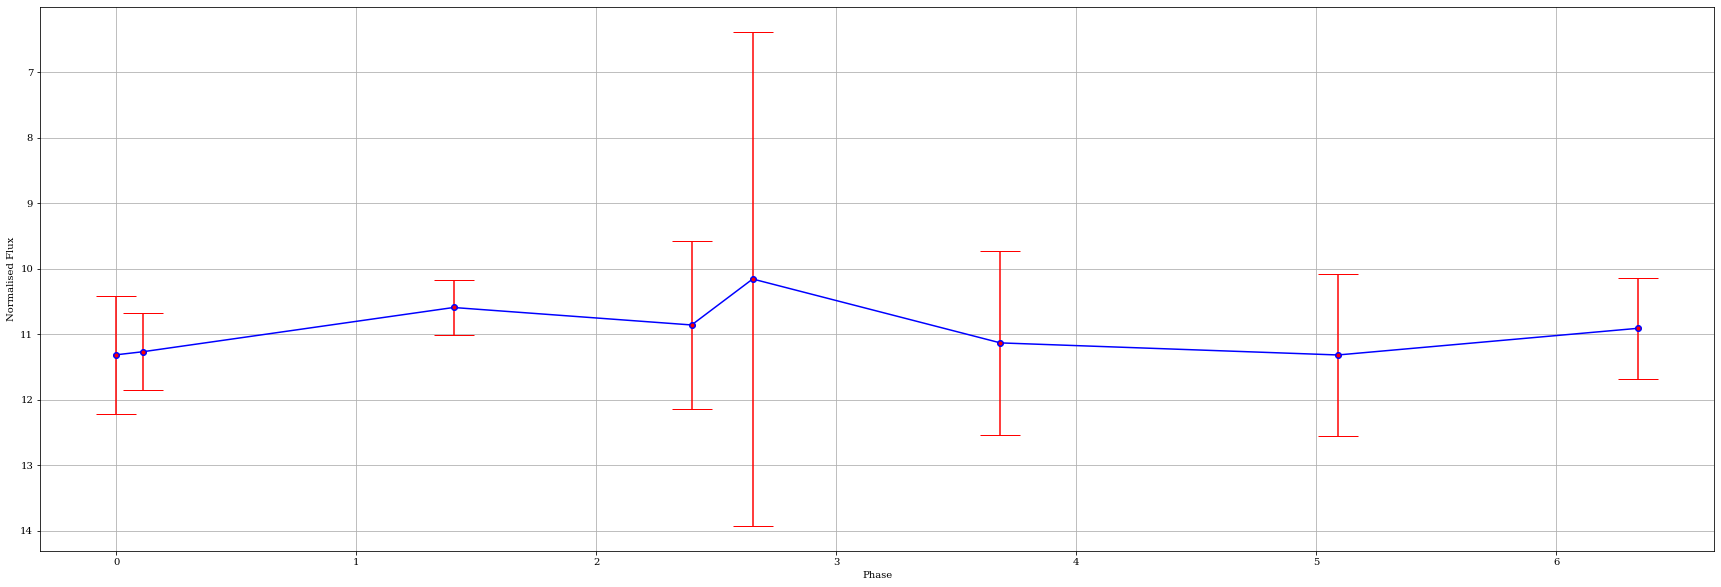

In [33]:
print(realmagsourceB)

from scipy.optimize import curve_fit

errY=[] 
for i in range(len(realmagsourceB)):
    err_sm=np.sqrt(((Bunc_m[i]**2)*(realmagsourceB[i])**2)+(Bunc_c[i]**2)+2*realmagsourceB[i]*Bunc_mc[i]**2)    
    errY.append(err_sm)

#errY=np.array(errY)
#errY=np.sqrt(errY)/max(errY)
#print(np.mean(realmagsourceV))

print(tact)

plt.figure(figsize=(30,10))
plt.plot(tact,realmagsourceB,'bo-')
#plt.plot(curvephase,curve,'r--')
plt.errorbar(tact,realmagsourceB,yerr=errY,fmt='r.',capsize=20)

plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(-10.8,-12)
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')    
print(errY)

# Let's try R

In [68]:
Rpositions=[]

#coords0=("05:28:46.182 +42:26:15.311")
coords0=[("06:47:09.4 +03:58:01.5"),("06 47 05.24472 +03 56 32.6688"),("06:47:14.87867 +03:58:30.09"),
         ("06:47:15.26592 +04:00:32.10"),('06:47:04.996 +03:59:01.2777'),('06:47:14.46000 +03:56:21.076'),
        ('06:47:16.59264 +03:58:31.972')]

c0 = SkyCoord(coords0, frame=ICRS, unit=(u.hourangle, u.deg), obstime="J2000.0")

for i in range(len(c1Rimg)):  
    indexlist=[]
    obj1=c1Rimg[i]
    hdu=c1Rhdr[i]
    wcs = WCS(hdu)
    y=shift.skycoord_to_pixel(c0, wcs,origin=0, mode='wcs')
    loc= np.transpose((y[:][0], y[:][1]))
    Rpositions.append(loc)
    
fwhm_val=[]
appR_val=[]

for i in range(len(c1Rimg)): 
    x_float=Rpositions[i][0][1]
    xpos=int(np.rint(Rpositions[i][0][1]))
    ypos=int(np.rint(Rpositions[i][0][0]))    
    x=np.linspace(xpos-20,xpos+20,40)
    y=c1Rimg[i][xpos-20:xpos+20,ypos]
    fwhm=FWHM(x,y)
    app=np.rint(fwhm+2)
    fwhm_val.append(fwhm)
    appR_val.append(app)

In [69]:
sourceflux = []
tfr1 = []
tfr2 = []
tfr3 = []
tfr4 = []
tfr5 = []
tfr6 = []


 
for i in range(len(Rpositions)):
    

    
        x_S, y_S = Rpositions[i][0]
        x_1, y_1 = Rpositions[i][1]
        x_2, y_2 = Rpositions[i][2]
        x_3, y_3 = Rpositions[i][3]
        x_4, y_4 = Rpositions[i][4]
        x_5, y_5 = Rpositions[i][5]
        x_6, y_6 = Rpositions[i][6]

        image= c1Rimg[i] 
        appsize=appR_val[i][0]
        positionsa = [(x_S,y_S),(x_1,y_1),(x_2, y_2),(x_3, y_3),(x_4, y_4),(x_5, y_5),(x_6, y_6)]
        apertures = CircularAperture(positionsa,r=appsize)
        annulus_apertures = CircularAnnulus(positionsa, r_in=appsize+2, r_out=appsize+4)
        apers = [apertures,annulus_apertures]
        phot_table = aperture_photometry(image,apers)
        bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area
        bkg_sum = bkg_mean * apertures.area
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['residual_aperture_sum']=final_sum

        sourceflux.append(final_sum[0])
        tfr1.append(final_sum[1])
        tfr2.append(final_sum[2])
        tfr3.append(final_sum[3])
        tfr4.append(final_sum[4])
        tfr5.append(final_sum[5])
        tfr6.append(final_sum[6])
        #print(phot_table)
       
        

Text(0.5, 0, 'Phase')

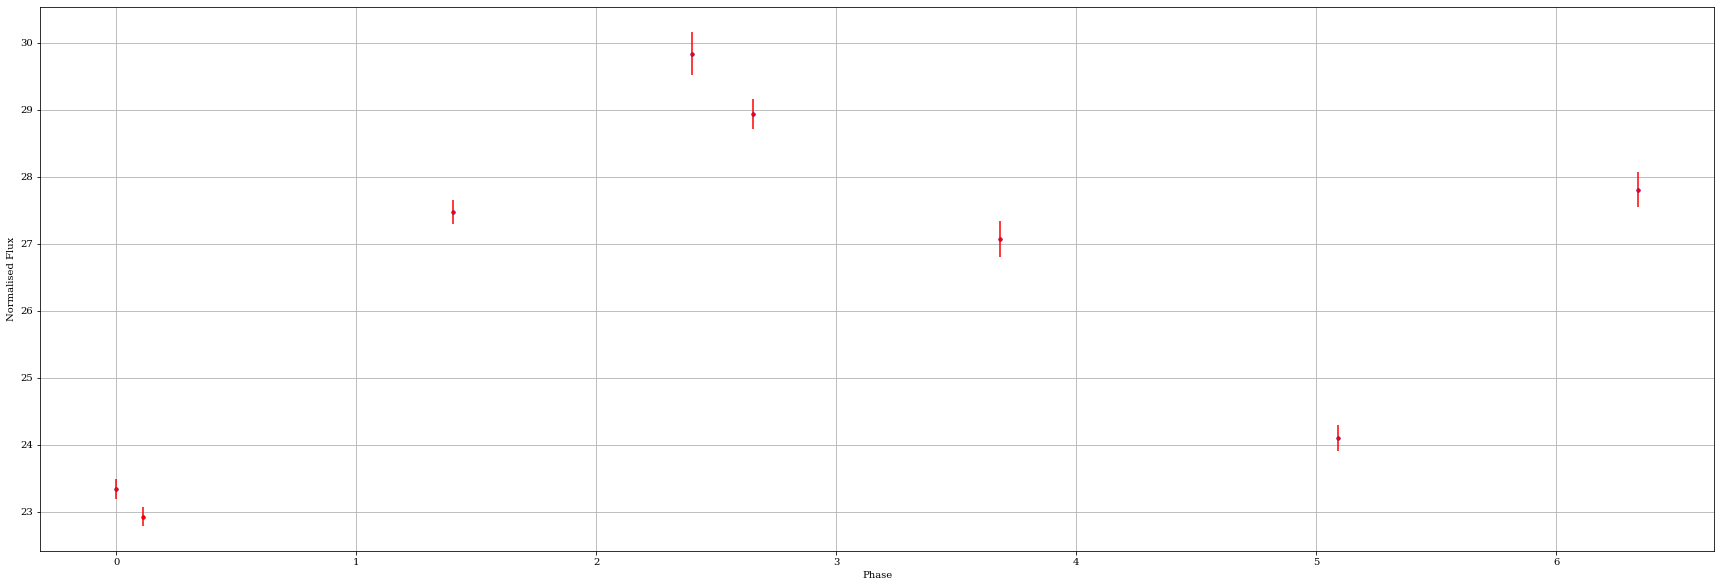

In [70]:
tfs=np.array(sourceflux)
tfr1=np.array(tfr1)
tfr2=np.array(tfr2)
tfr3=np.array(tfr3)
tfr4=np.array(tfr4)
tfr5=np.array(tfr5)
tfr6=np.array(tfr6)



flux1=(tfs/tfr1)
flux2=tfs/tfr1
flux3=(2*tfs)/(tfr1+tfr2)
π=np.pi



tact=np.array([0,127,1602,2733,3023,4200,5803,7229])

tact=tact/1140


#tact=np.array([1., 1.02697422, 1.28291067, 1.34025742, 0.58047662, 0.89206066, 1.23253048, 1.53540631])
#tact=tact-0.44
tactlong=np.linspace(-2,6.5,100)
from scipy.optimize import curve_fit

def func(x,b,c,d,e,f):
    return b*x**4+c*x**3+d*x**2+e*x+f

def func1(x,a,b,c):
    return a*np.sin(x+b*np.sin(x))+c

#opt,cov=curve_fit(func,tact,flux1)
#opt1,cov1=curve_fit(func1,t1,flux1)
#
rootfs=np.sqrt(tfs)
rootf1=np.sqrt(tfr1)

error=np.sqrt((rootfs/tfr1)**2+((tfs*rootf1)/tfr1**2)**2)

#t=np.arange(0,len(tfs),1)
plt.figure(figsize=(30,10))

plt.plot(tact,flux1,'b.')

#plt.plot(x,y,'r-',)
#plt.plot(tactlong+0.5,func1(tactlong,*opt1),'b-',linewidth=0.8)
plt.errorbar(tact,flux1, yerr=error,fmt='r.')
plt.grid(True)
#plt.ylim(10**5,10**6)

#plt.gca().invert_yaxis()
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')
#plt.savefig(r'lightcurve2V.png')

In [71]:
def s2j(r,g):
    return r - 0.1837*(g - r) - 0.0971
rmag=np.array([13.682,12.762,12.545,12.613,13.109])
gmag=np.array([13.909,12.969,12.565,13.177,13.616])



#,12.613
#,13.177
#
def Mag_ref(f):
    return -2.5*np.log10(f)

def func(x,a,b):
    return a*x+b


actmagR=s2j(rmag,gmag)
errR=np.array([0.068,0.34,0.34,0.28,0.064])

mlist=[]
clist=[]
covlist=[]

machinemagA=Mag_ref(tfr1)
machinemagB=Mag_ref(tfr2)
machinemagC=Mag_ref(tfr3)
machinemagD=Mag_ref(tfr4)
machinemagE=Mag_ref(tfr5)
machinemagF=Mag_ref(tfr6)
sourcemagR=Mag_ref(tfs)

realsource=[]

guess=[1.,24]

for i in range(len(tfr1)): 
    
    #magnitudes=([machinemagA[i],machinemagB[i],machinemagC[i],machinemagD[i],machinemagE[i]])
    magnitudes=([machinemagA[i],machinemagB[i],machinemagC[i],machinemagD[i],machinemagE[i]])
    opt,cov = curve_fit(func,magnitudes,actmagR,p0=guess,sigma=errR)
    mlist.append(opt[0])
    clist.append(opt[1])
    covlist.append(cov)
    

    
print(mlist)
print(clist)   

[1.0649452265112591, 1.0439017412202714, 1.1140730958862846, 1.1001002799437434, 1.0533282509825226, 1.0380364898828294, 1.0471017518702996, 1.083729536655941]
[25.318769352774137, 25.152611934377024, 25.69400307153761, 24.376448412983418, 24.642876531758944, 24.009506655001303, 24.543584756810077, 24.535714228039005]


Text(0.5, 0, 'Input Mag')

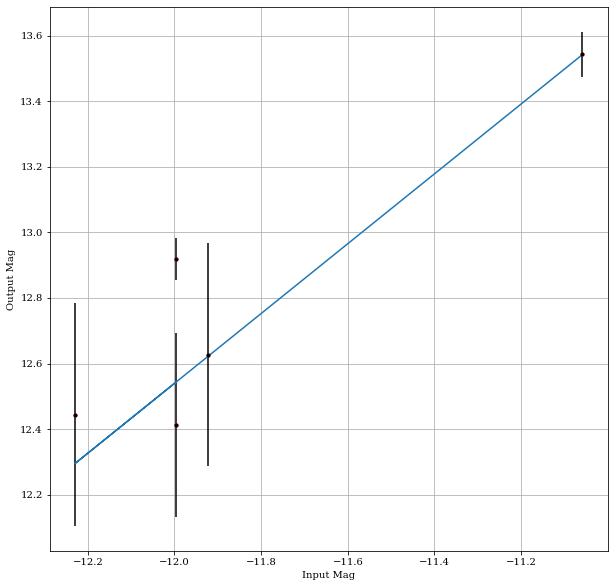

In [50]:
magnitudes=([machinemagA[0],machinemagB[0],machinemagC[0],machinemagD[0],machinemagD[0]])
m=np.ones(len(magnitudes))*mlist[0]
c=np.ones(len(magnitudes))*clist[0]

#
#magnitudes=np.ones(len(magnitudes))-magnitudes

plt.figure(figsize=(10,10))
#plt.plot(x,y,'b.')
plt.plot(magnitudes,actmagR,'r.')
plt.errorbar(magnitudes,actmagR,yerr=errR,fmt='k.')
plt.plot(magnitudes,func(magnitudes,m,c))
plt.grid(True)
#plt.xlim(-0.06,0.06)
plt.ylabel(r'Output Mag')
plt.xlabel(r'Input Mag')

[9.899565963091925, 9.987151625178797, 9.532091376613607, 9.48558513439602, 9.691514205921159, 9.826623354643775, 9.924758439346876, 9.629634920517164]
[0.9037084476967313, 0.5836256941572188, 0.4156853743776697, 1.2796630981115595, 3.7731924474276166, 1.4044402576342891, 1.2393158999147815, 0.7737279546765999]


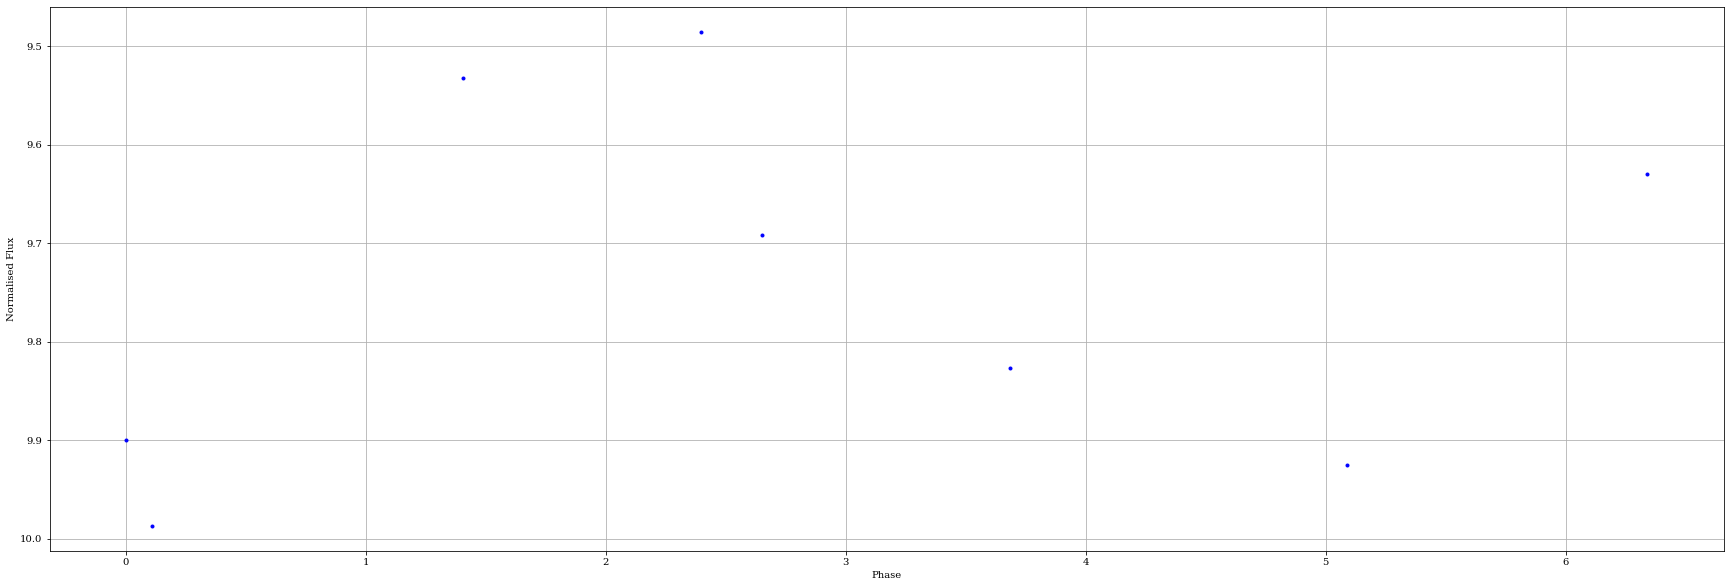

In [72]:
realmagsourceR=[]

for i in range(len(sourcemagR)):
    y=mlist[i]*sourcemagR[i]+clist[i]
    realmagsourceR.append(y)
    
    
Runc_m=[]
Runc_c=[]
Runc_mc=[]

for i in range(len(covlist)):
    Runc_m.append(np.sqrt(covlist[i][0,0]))
    Runc_c.append(np.sqrt(covlist[i][1,1]))
    Runc_mc.append(np.sqrt(covlist[i][0,1]))


print(realmagsourceR)

errYR=[] 

for i in range(len(realmagsourceR)):
    err_sm=np.sqrt(((Runc_m[i]**2)*(realmagsourceR[i])**2)+(Runc_c[i]**2)+2*realmagsourceR[i]*Runc_mc[i]**2)    
    errYR.append(err_sm)
    
#errYR=np.array(errYR)
#
#errYR=np.sqrt(errYR)/max(errYR)

#tact=np.array([0,127,1332,1602,2733,3023,4200,5803,7229])

plt.figure(figsize=(30,10))
plt.plot(tact,realmagsourceR,'b.')
#plt.errorbar(tact,realmagsourceR,yerr=errYR,fmt='r.',capsize=20)

plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(-10.8,-12)
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')
print(errY)

# I time baby


In [56]:
Ipositions=[]

#coords0=("05:28:46.182 +42:26:15.311")
coords0=[("06:47:09.4 +03:58:01.5"),("06 47 05.24472 +03 56 32.6688"),("06:47:14.87867 +03:58:30.09"),
         ("06:47:15.26592 +04:00:32.10"),('06:47:04.996 +03:59:01.2777'),('06:47:14.46000 +03:56:21.076'),
        ('06:47:16.59264 +03:58:31.972')]

c0 = SkyCoord(coords0, frame=ICRS, unit=(u.hourangle, u.deg), obstime="J2000.0")

for i in range(len(c1Iimg)):  
    indexlist=[]
    obj1=c1Iimg[i]
    hdu=c1Ihdr[i]
    wcs = WCS(hdu)
    y=shift.skycoord_to_pixel(c0, wcs,origin=0, mode='wcs')
    loc= np.transpose((y[:][0], y[:][1]))
    Ipositions.append(loc)

In [57]:
fwhm_val=[]
appI_val=[]

for i in range(len(c1Iimg)): 
    x_float=Ipositions[i][0][1]
    xpos=int(np.rint(Ipositions[i][0][1]))
    ypos=int(np.rint(Ipositions[i][0][0]))    
    x=np.linspace(xpos-20,xpos+20,40)
    y=c1Iimg[i][xpos-20:xpos+20,ypos]
    fwhm=FWHM(x,y)
    app=np.rint(fwhm+2)
    fwhm_val.append(fwhm)
    appI_val.append(app)

In [58]:
sourceflux = []
tfr1 = []
tfr2 = []
tfr3 = []
tfr4 = []
tfr5 = []
tfr6 = []


 
for i in range(len(Ipositions)):
    

    
        x_S, y_S = Ipositions[i][0]
        x_1, y_1 = Ipositions[i][1]
        x_2, y_2 = Ipositions[i][2]
        x_3, y_3 = Ipositions[i][3]
        x_4, y_4 = Ipositions[i][4]
        x_5, y_5 = Ipositions[i][5]
        x_6, y_6 = Ipositions[i][6]

        image= c1Iimg[i] 
        appsize=appI_val[i][0]
        positionsa = [(x_S,y_S),(x_1,y_1),(x_2, y_2),(x_3, y_3),(x_4, y_4),(x_5, y_5),(x_6, y_6)]
        apertures = CircularAperture(positionsa,r=appsize)
        annulus_apertures = CircularAnnulus(positionsa, r_in=appsize+2, r_out=appsize+4)
        apers = [apertures,annulus_apertures]
        phot_table = aperture_photometry(image,apers)
        bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area
        bkg_sum = bkg_mean * apertures.area
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['residual_aperture_sum']=final_sum

        sourceflux.append(final_sum[0])
        tfr1.append(final_sum[1])
        tfr2.append(final_sum[2])
        tfr3.append(final_sum[3])
        tfr4.append(final_sum[4])
        tfr5.append(final_sum[5])
        tfr6.append(final_sum[6])
        #print(phot_table)
       
        

Text(0.5, 0, 'Phase')

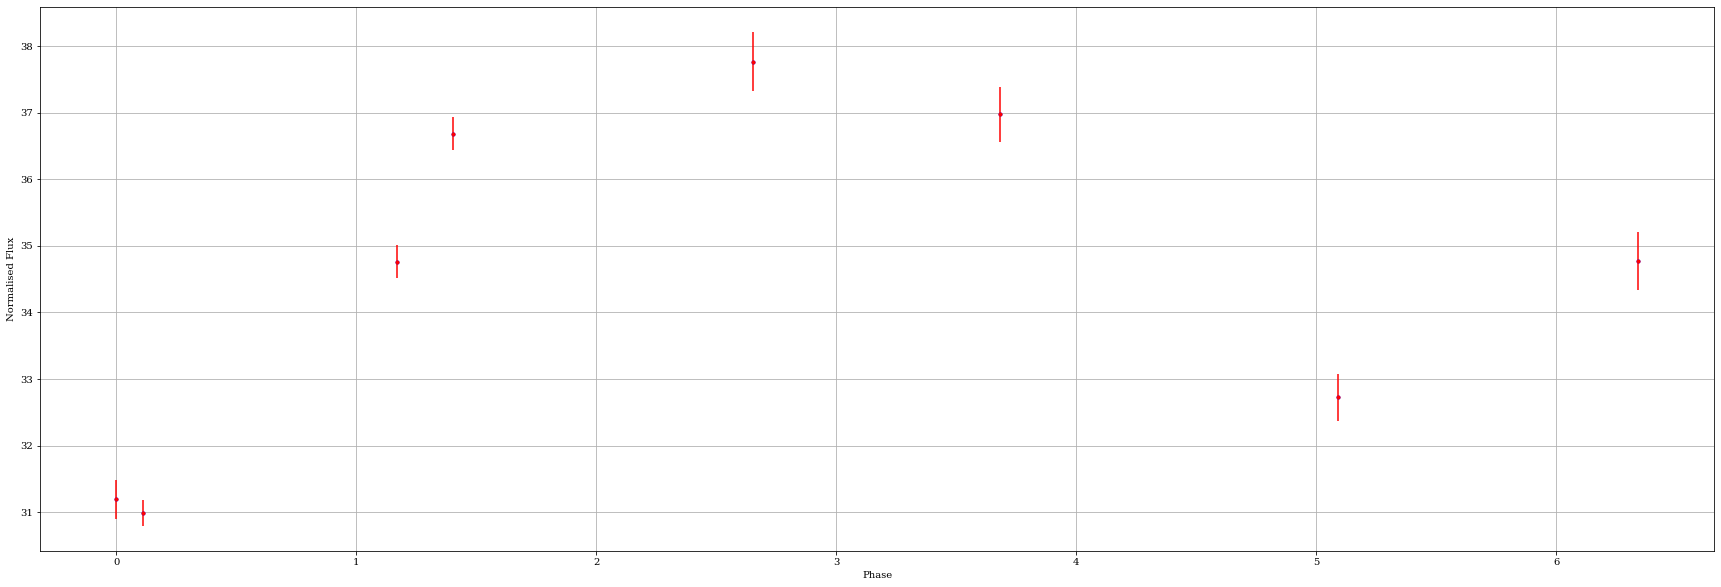

In [59]:
tfs=np.array(sourceflux)
tfr1=np.array(tfr1)
tfr2=np.array(tfr2)
tfr3=np.array(tfr3)
tfr4=np.array(tfr4)
tfr5=np.array(tfr5)
tfr6=np.array(tfr6)



flux1=(tfs/tfr1)
flux2=tfs/tfr1
flux3=(2*tfs)/(tfr1+tfr2)
π=np.pi



tact=np.array([0,127,1332,1602,3023,4200,5803,7229])

tact=tact/1140


#tact=np.array([1., 1.02697422, 1.28291067, 1.34025742, 0.58047662, 0.89206066, 1.23253048, 1.53540631])
#tact=tact-0.44
tactlong=np.linspace(-2,6.5,100)
from scipy.optimize import curve_fit

def func(x,b,c,d,e,f):
    return b*x**4+c*x**3+d*x**2+e*x+f

def func1(x,a,b,c):
    return a*np.sin(x+b*np.sin(x))+c

#opt,cov=curve_fit(func,tact,flux1)
#opt1,cov1=curve_fit(func1,t1,flux1)
#
rootfs=np.sqrt(tfs)
rootf1=np.sqrt(tfr1)

error=np.sqrt((rootfs/tfr1)**2+((tfs*rootf1)/tfr1**2)**2)

#t=np.arange(0,len(tfs),1)
plt.figure(figsize=(30,10))

plt.plot(tact,flux1,'b.')

#plt.plot(x,y,'r-',)
#plt.plot(tactlong+0.5,func1(tactlong,*opt1),'b-',linewidth=0.8)
plt.errorbar(tact,flux1, yerr=error,fmt='r.')
plt.grid(True)
#plt.ylim(10**5,10**6)

#plt.gca().invert_yaxis()
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')
#plt.savefig(r'lightcurve2V.png')

In [62]:
def s2j2(r,i):
    return r - 1.2444*(r - i) - 0.3820
rmag=np.array([13.682,12.762,12.545,12.613,13.109])
imag=np.array([13.66,12.675,12.658,12.421,12.909])



#,12.613
#,13.177
#
def Mag_ref(f):
    return -2.5*np.log10(f)

def func(x,a,b):
    return a*x+b


actmagI=s2j2(rmag,imag)
errI=np.array([0.049,0.17,0.25,0.268,0.093])

mlist=[]
clist=[]
covlist=[]

machinemagA=Mag_ref(tfr1)
machinemagB=Mag_ref(tfr2)
machinemagC=Mag_ref(tfr3)
machinemagD=Mag_ref(tfr4)
machinemagE=Mag_ref(tfr5)
machinemagF=Mag_ref(tfr6)
sourcemagI=Mag_ref(tfs)

realsource=[]

guess=[1.,25]

for i in range(len(tfr1)): 
    
    #magnitudes=([machinemagA[i],machinemagB[i],machinemagC[i],machinemagD[i],machinemagE[i]])
    magnitudes=([machinemagA[i],machinemagB[i],machinemagC[i],machinemagD[i],machinemagE[i]])
    opt,cov = curve_fit(func,magnitudes,actmagI,p0=guess,sigma=errI)
    mlist.append(opt[0])
    clist.append(opt[1])
    covlist.append(cov)
    

    
print(mlist)
print(clist)   

[1.0971844221194917, 1.071473865979687, 1.1397261297569918, 1.3496070753349703, 1.1174753987383983, 1.0472504928146238, 1.1755057980004304, 1.1396673122054417]
[24.44367978451586, 25.127222244471717, 25.497922305952375, 27.924395428224805, 24.08437653613523, 23.521507107327363, 24.858801109707137, 24.134896720091515]


[10.498135160789198, 9.708336035909065, 9.451198937558203, 8.124149037330614, 10.299674621506192, 9.78246329821717, 10.25473731123055, 10.031352172385358]
[0.9037084476967313, 0.5836256941572188, 0.4156853743776697, 1.2796630981115595, 3.7731924474276166, 1.4044402576342891, 1.2393158999147815, 0.7737279546765999]


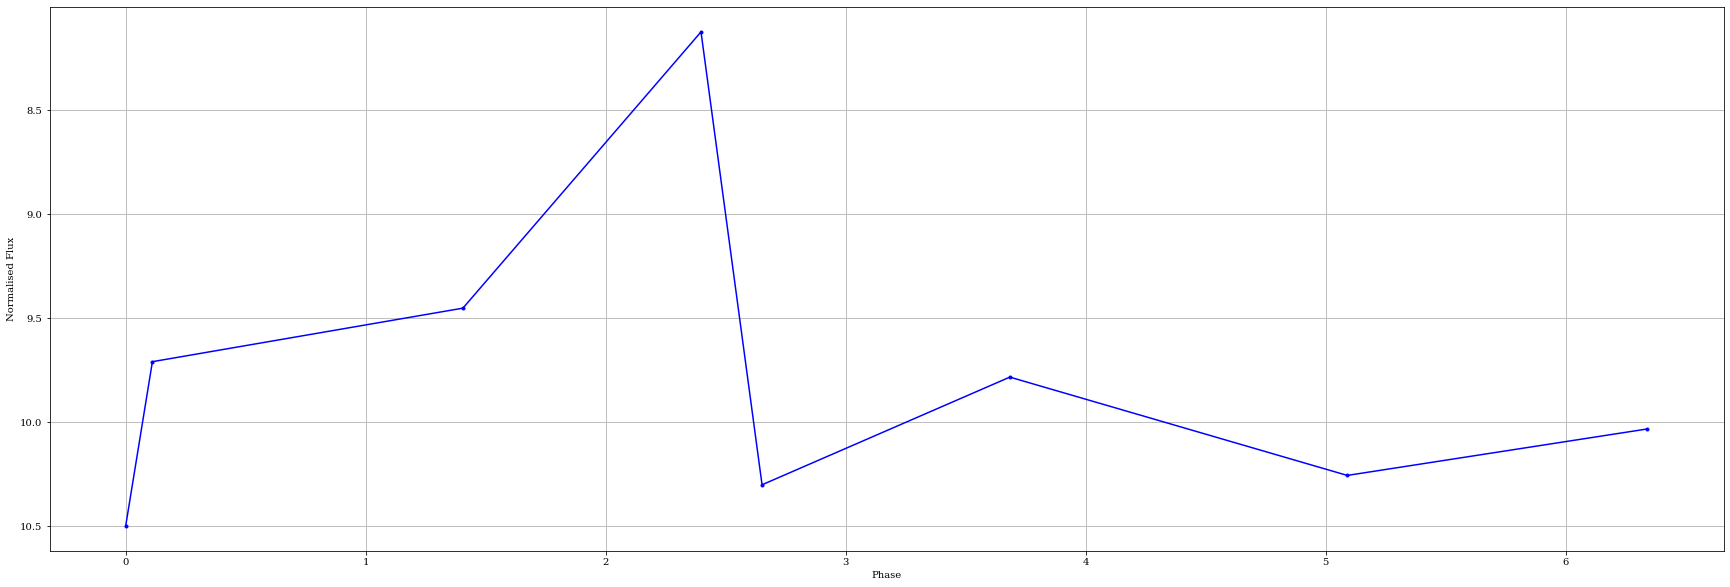

In [73]:
realmagsourceI=[]

for i in range(len(sourcemagI)):
    y=mlist[i]*sourcemagI[i]+clist[i]
    realmagsourceI.append(y)
    
    
Iunc_m=[]
Iunc_c=[]
Iunc_mc=[]

for i in range(len(covlist)):
    Iunc_m.append(np.sqrt(covlist[i][0,0]))
    Iunc_c.append(np.sqrt(covlist[i][1,1]))
    Iunc_mc.append(np.sqrt(covlist[i][0,1]))




print(realmagsourceI)

errYI=[] 
for i in range(len(realmagsourceI)):
    err_sm=np.sqrt(((Iunc_m[i]**2)*(realmagsourceI[i])**2)+(Iunc_c[i]**2)+2*realmagsourceI[i]*Iunc_mc[i]**2)    
    errYI.append(err_sm)
    
errYI=np.array(errYI)

#errYI=np.sqrt(errYI)/max(errYI)

#tact=np.array([0,127,1332,1602,2733,3023,4200,5803,7229])

plt.figure(figsize=(30,10))
plt.plot(tact,realmagsourceI,'b.-')
#plt.errorbar(tact,realmagsourceI,yerr=errYI,fmt='r.',capsize=20)

plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(-10.8,-12)
plt.ylabel(r'Normalised Flux')
plt.xlabel(r'Phase')
print(errY)

In [7]:
for i in range(len(c1Vimg)):
    print(np.max(c1Vimg[i]))
    
for i in range(len(c1Rimg)):
    print(np.max(c1Rimg[i]))
    
for i in range(len(c1Bimg)):
    print(np.max(c1Bimg[i]))
    
for i in range(len(c1Iimg)):
    print(np.max(c1Iimg[i]))

16825.79749316157
7936.209616792836
16157.444547714791
6110.048131286994
34176.77654695617
13417.685060677384
28418.764474674703
57652.162333698034
26978.746652057944
50006.529564815166
27477.832874936255
13589.014790956744
42365.72585680047
34900.682542946415
60184.8379625945
62228.15211481777
52779.41116558184
16177.547958620593
11364.822358134532
5021.375976057043
31323.658317162837
12807.902007472609
36564.43413270081
23469.786798559668
27063.00523789002
55411.17966113687
38961.643702072375
18389.024265541517
20538.37924950619
43968.86891765786
48851.58391051265
49071.91389159287
36992.86904001134


In [80]:
TotBackground=[]
Totnpix=[]
TotSource=[]


for i in range(len(c1Iimg)): 
    N_star=[]
    N_back=[]
    N_pix=[]
    image = c1Iimg[i]    
    r=appI_val[i][0]
    apertures = CircularAperture(Ipositions[i][1],r=r)
    annulus_apertures = CircularAnnulus(Ipositions[i][1], r_in=r+2, r_out=r+5)
    apers = [apertures,annulus_apertures]
    phot_table = aperture_photometry(image,apers)
    f_source=phot_table[0][3]
    N_star.append(f_source)
    f_ref=phot_table[0][4]
    N_back.append(f_ref/annulus_apertures.area)
    N_pix.append(apertures.area)
            
    TotBackground.append(N_back)
    TotSource.append(N_star)
    Totnpix.append(N_pix)
    

TotBackground=np.array(TotBackground)
TotSource=np.array(TotSource)
Totnpix=np.array(Totnpix)

def SNR(a,b,c): 
    return(a/np.sqrt(a+b*c))

s2n=SNR(TotSource,Totnpix,TotBackground)
s2n


array([[126.40422713],
       [201.47433103],
       [155.07923074],
       [219.78476866],
       [ 87.42682281],
       [104.26382807],
       [ 96.49385939],
       [ 81.68066737]])